In [1]:
import pandas as pd

df_lb1 = pd.read_csv(r"C:\Users\admin\Desktop\Git_p\customer-support-classification\data_raw\labeled_Baomy_tiki_1.csv")

In [2]:
df_lb2 = pd.read_csv(r"C:\Users\admin\Desktop\Git_p\customer-support-classification\data_raw\labeled_Baomy_tiki_2.csv")

In [3]:
df_lb3 = pd.read_csv(r"C:\Users\admin\Desktop\Git_p\customer-support-classification\data_raw\Baomy_labeled_3.csv")

In [4]:
df_lb4 = pd.read_csv(r"C:\Users\admin\Desktop\Git_p\customer-support-classification\data_raw\labeled_Baomy_tiki_4.csv")

In [5]:
df_lb5 = pd.read_csv(r"C:\Users\admin\Desktop\Git_p\customer-support-classification\data_raw\labeled_Baomy_tiki_5.csv")

In [7]:
import pandas as pd

dfmy = pd.concat([df_lb1, df_lb2, df_lb3,df_lb4,df_lb5], ignore_index=True)

print(dfmy.shape)   # xem kích thước
print(dfmy.head())  # xem vài dòng đầu


(839, 5)
                                             content  rating  \
0  Mua hàng chiều ngày 06/03/2023. Nhận hàng sáng...       5   
1  Hôm qua mình mua 1 bình về vợ thấy thích quá. ...       5   
2  Mua lần thứ 2, giữ lạnh cũng tầm được hơn 12 t...       4   
3  Cũng là shop tick xanh uy tín chứ không phải l...       1   
4  Tiki giao hàng nhanh và đóng gói cẩn thận. Về ...       5   

           created_at  thank_count  label  
0           Sương Hoa            5  other  
1           Tùng Phạm           18  other  
2            Bảo Long            0    neg  
3             rosa bt            3    neg  
4  Nguyễn Trường Tuấn            1    pos  


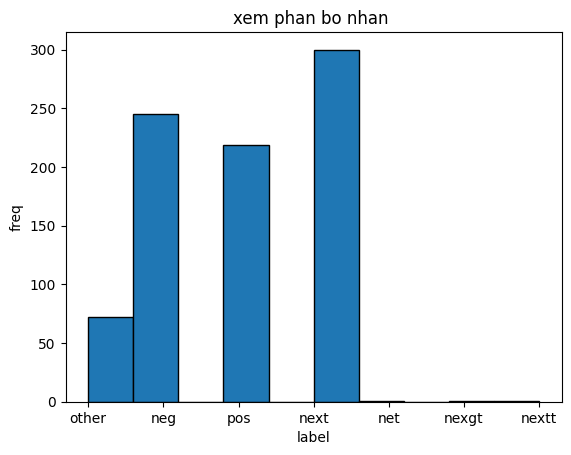

In [ ]:
import matplotlib.pyplot as plt 

plt.hist(dfmy["label"], edgecolor = 'black')
plt.xlabel("label")
plt.ylabel("freq")
plt.title("xem phan bo nhan ")
plt.show()

In [9]:
dfmy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   content      541 non-null    object
 1   rating       839 non-null    int64 
 2   created_at   837 non-null    object
 3   thank_count  839 non-null    int64 
 4   label        839 non-null    object
dtypes: int64(2), object(3)
memory usage: 32.9+ KB


-----

In [10]:
dfmy = dfmy.dropna()

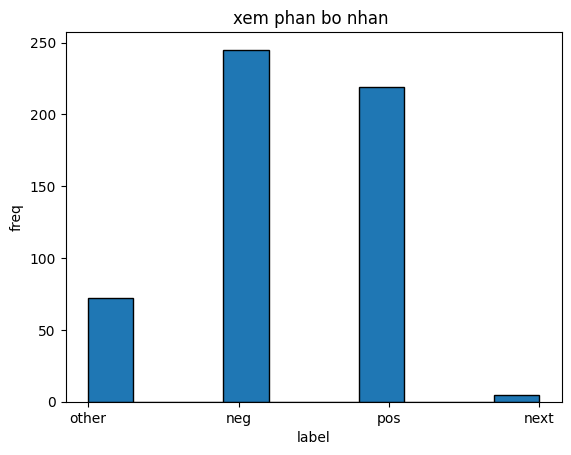

In [11]:
import matplotlib.pyplot as plt 

plt.hist(dfmy["label"], edgecolor = 'black')
plt.xlabel("label")
plt.ylabel("freq")
plt.title("xem phan bo nhan ")
plt.show()

In [12]:
dfmy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541 entries, 0 to 825
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   content      541 non-null    object
 1   rating       541 non-null    int64 
 2   created_at   541 non-null    object
 3   thank_count  541 non-null    int64 
 4   label        541 non-null    object
dtypes: int64(2), object(3)
memory usage: 25.4+ KB


In [13]:
dfmy = dfmy[~dfmy["label"].isin(["next"])]

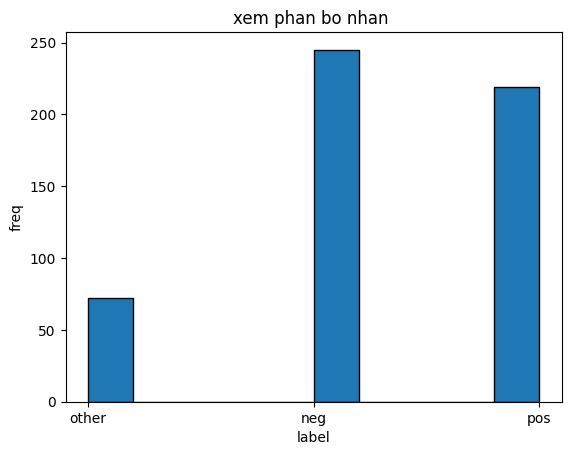

In [15]:
import matplotlib.pyplot as plt 

plt.hist(dfmy["label"], edgecolor = 'black')
plt.xlabel("label")
plt.ylabel("freq")
plt.title("xem phan bo nhan ")
plt.show()

----------

In [16]:
dfthang=pd.read_csv(r"C:\Users\admin\Desktop\Git_p\customer-support-classification\data_raw\hthang_noise.csv")

In [27]:
dfduong=pd.read_csv(r"C:\Users\admin\Desktop\Git_p\customer-support-classification\data_raw\noisy_feedback_payment.csv")
dfhung=pd.read_csv(r"C:\Users\admin\Desktop\Git_p\customer-support-classification\data_raw\Hung_shopee.csv")
dfphu=pd.read_csv(r"C:\Users\admin\Desktop\Git_p\customer-support-classification\data_raw\data_dirty_doi_tra_bao hanh_Phongphu.csv")
dfkhanh=pd.read_csv(r"C:\Users\admin\Desktop\Git_p\customer-support-classification\data_raw\noisy_feedback_promo.csv")
dfthuan=pd.read_csv(r"C:\Users\admin\Desktop\Git_p\customer-support-classification\data_raw\noisy_feedback.csv")

In [28]:
df = pd.concat([dfmy,dfduong,dfthang,dfthuan,dfphu,dfkhanh,dfhung],ignore_index=True)

---------

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1732 entries, 0 to 1731
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   content      1336 non-null   object 
 1   rating       1336 non-null   float64
 2   created_at   1136 non-null   object 
 3   thank_count  1136 non-null   float64
 4   label        736 non-null    object 
 5   ID           200 non-null    float64
 6   Nội dung     200 non-null    object 
 7   Đánh giá     200 non-null    float64
 8   Label        200 non-null    float64
 9   Unnamed: 4   0 non-null      float64
 10  Unnamed: 5   1 non-null      object 
 11  TicketID     196 non-null    object 
 12  UserName     176 non-null    object 
 13  Request      196 non-null    object 
 14  Category     195 non-null    object 
 15  Priority     195 non-null    object 
 16  TimeStamp    195 non-null    object 
 17  idex         200 non-null    float64
 18  user_name    200 non-null    object 
dtypes: flo

In [31]:
df["label"]=df["label"].fillna('').astype(str) + " "+df["Category"].fillna('').astype(str)+" "+df["Label"].fillna('').astype(str)
df["label"]=df["label"].str.strip()
df = df.drop(columns=["Label", "Category"])

In [36]:
df["content"]=df["Nội dung"].fillna('').astype(str)+" "+df["Request"].fillna('').astype(str)+" "+df["content"].fillna('').astype(str)
df["content"]=df["content"].str.strip()
df=df.drop(columns=["Nội dung","Request"])

In [41]:
df["rating"]=df["rating"].fillna('').astype(str)+" "+df["Đánh giá"].fillna('').astype(str)
df["rating"]=df["rating"].str.strip()
df=df.drop(columns=["Đánh giá"])

In [45]:
df["created_at"]=df["UserName"].fillna('').astype(str)+" "+df["user_name"].fillna('').astype(str)
df["created_at"]=df["created_at"].str.strip()
df=df.drop(columns=["user_name","UserName","TimeStamp"])

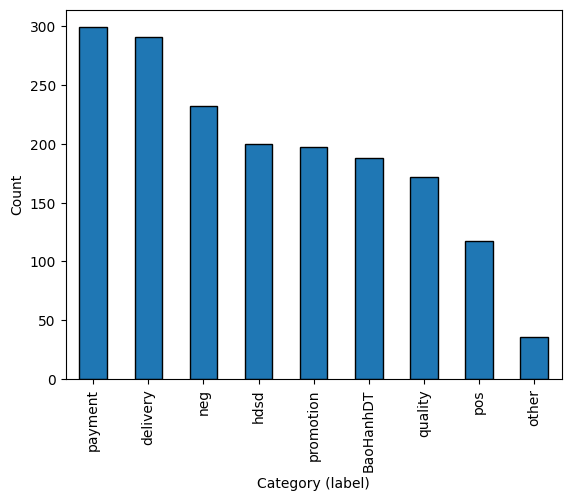

In [73]:
df["label"].value_counts().plot(kind="bar", edgecolor="black")
plt.xlabel("Category (label)")
plt.ylabel("Count")
plt.show()

In [72]:
mapping = {
    "DoiTra": "BaoHanhDT", "DoiTraBaoHanh": "BaoHanhDT", "Return": "BaoHanhDT","Bao hanh":"BaoHanhDT","Đổi Trả":"BaoHanhDT","Bảo Hành":"BaoHanhDT","BaoHanh":"BaoHanhDT","doi-tra":"BaoHanhDT",
    "4.0":"hdsd",
    "chất lượng sản phẩm" : "quality",
    "":"payment"
}

df["label"] = df["label"].replace(mapping)

In [56]:
df.loc[df["content"].str.contains("ship", case=False, na=False), "label"] = "delivery"
df.loc[df["content"].str.contains("voucher|km|sale", case=False, na=False), "label"] = "promotion"

------

TIEN XU LY

In [7]:
#độ dài trung bình ( kí tự , từ )

df["len_ki_tu"] = df["content"].astype(str).apply(len)
df["len_word"] = df["content"].astype(str).apply(lambda x : len(x.split()))

In [8]:
df.head()

,content,rating,created_at,thank_count,len_ki_tu,len_word
0,Đã nhận nồi. Đợi lâu mất mí hôm nhưng bõ công ...,5,Hoàng Minh Minh,0,410,100
1,Đây là video về nồi cơm điện EJR426 mà tôi nhậ...,5,Hoàng Minh Thái,1,204,46
2,Nhỏ xinh.\nPhù hợp ở trọ một mình hoặc 2ng.\nĐ...,5,V Musical,1,506,119
3,Ok càbwfwifwibfbxwxb cơm hơi cháy nên bật ít t...,5,Thùy Dương,1,59,10
4,Rất hài lòng với sản phầm này của Panasonic. K...,5,Nguyễn Đức,7,282,61


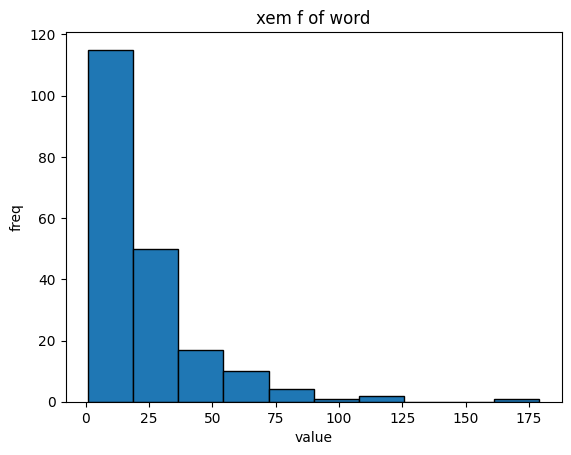

In [10]:
import matplotlib.pyplot as plt

plt.hist(df["len_word"], edgecolor = 'black')
plt.xlabel("value")
plt.ylabel("freq")
plt.title("xem f of word")
plt.show()

outlier : 175 words 